In [7]:
%pylab inline
from IPython import display
import scipy.integrate as sci
import scipy.special as spe
import scipy.optimize as opt
rcParams.update({'figure.max_open_warning': 0})
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['display', 'sci', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
#analytic velocity determination

# the substrate will have a different length for each potential steady state velocity
def xsf(v,t):
    dx = 0.1
    travel = abs(v*t)
    if travel < 10.0:          # I found that if the velocity was low enough v*t could not capture all the relevant values 
        length = 10.0          # min_length used if substrate not long enough for small speeds 
    else:
        length =travel 
    return linspace(-length, 10.0, int(2*length/dx) + 1) 

#function to determine the bound complex concentration as function of x
def a_c(v, xs,a0,nu,tc): 
    Nx = len(xs)
    Ac = zeros(Nx)            #will fill this array with calculated values when function is called

    #the only way I could think to set up this integral without actual values of v
    integrand = lambda t: exp(nu*t)*exp(-0.5*(xs[i]-v*t)**2)* a0* exp(sqrt(pi/2)*(spe.erf((xs[i] - v * t)/sqrt(2))-1)/v)

    #assign values to Ac for each point in space depending on: v, xs, nu and a0
    for i in range(Nx):
        Ac[i] = sci.quad(integrand, tc, 0 )[0]
    return Ac

# parameters


a0s = array([0.1,0.32,1.0,3.16,10.0])
nus = logspace(-2, 2, 25, base=10)
a0_n = len(a0s)
nu_n = len(nus)
print(a0s,nus)

[ 0.1   0.32  1.    3.16 10.  ] [1.00000000e-02 1.46779927e-02 2.15443469e-02 3.16227766e-02
 4.64158883e-02 6.81292069e-02 1.00000000e-01 1.46779927e-01
 2.15443469e-01 3.16227766e-01 4.64158883e-01 6.81292069e-01
 1.00000000e+00 1.46779927e+00 2.15443469e+00 3.16227766e+00
 4.64158883e+00 6.81292069e+00 1.00000000e+01 1.46779927e+01
 2.15443469e+01 3.16227766e+01 4.64158883e+01 6.81292069e+01
 1.00000000e+02]


In [14]:

v_a0 = []            #list that stores finalvelocity(a0)
for a0  in a0s:          # look at each a0 value 
    
    v_a1 = []            #list that stores finalvelocity(nu)
    for nu in nus:       # look at each nu value
        print(a0,nu)

        tc = -8/nu        #cutoff time for integration, must satisfy e^(tc*nu) <= 1e-8
    
        

        #the transendental equation of which we need roots 
        f = lambda v: v - trapz(xsf(v,tc)*a_c(v,xsf(v,tc),a0,nu,tc), x = xsf(v,tc)) 

        #1e-8-2.0 is the guessed at range for possible speeds, 
        #but just to make sure use a try to make sure we don't get an error
        try:
            speed = opt.brentq(f, 1e-8,4.0) 
        except:
            speed = 0.0
        
        v_a1.append(speed)
    v_a0.append(v_a1)        # will compare with numerical solutions later on
v_a0 = array(v_a0)

0.1 0.01
0.1 0.014677992676220698


<ipython-input-12-f03126014dc1>:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Ac[i] = sci.quad(integrand, tc, 0 )[0]


0.1 0.021544346900318832
0.1 0.03162277660168379
0.1 0.046415888336127774
0.1 0.06812920690579612
0.1 0.1
0.1 0.1467799267622069
0.1 0.21544346900318834
0.1 0.31622776601683794
0.1 0.46415888336127775
0.1 0.6812920690579611
0.1 1.0
0.1 1.467799267622069
0.1 2.154434690031882
0.1 3.1622776601683795
0.1 4.6415888336127775
0.1 6.812920690579608
0.1 10.0
0.1 14.67799267622069
0.1 21.54434690031882
0.1 31.622776601683793
0.1 46.41588833612777
0.1 68.12920690579608
0.1 100.0
0.32 0.01
0.32 0.014677992676220698
0.32 0.021544346900318832
0.32 0.03162277660168379
0.32 0.046415888336127774
0.32 0.06812920690579612
0.32 0.1
0.32 0.1467799267622069
0.32 0.21544346900318834
0.32 0.31622776601683794
0.32 0.46415888336127775
0.32 0.6812920690579611
0.32 1.0
0.32 1.467799267622069
0.32 2.154434690031882
0.32 3.1622776601683795
0.32 4.6415888336127775
0.32 6.812920690579608
0.32 10.0
0.32 14.67799267622069
0.32 21.54434690031882
0.32 31.622776601683793
0.32 46.41588833612777
0.32 68.12920690579608
0.32

In [15]:
tf = 500.0

dG = 4
K = exp(-dG)
koff = K

# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)


def event(t, y):
    x0 = y[0]
        
    return 20.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied


# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xs,K,koff,a0):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Ac = y[1:N+1]          # bound complex on lattice
    As = y[-N:]             # unbound complex on lattice
    
    dxdt = sci.trapz(-(x0-xs)*Ac, x=xs)
    binding = exp(-0.5*(x0-xs)**2)*As 
    burnt = nu*Ac
    rebinding = koff/(1+K)*a0-koff*As

    dAcdt = (binding - burnt)
    dAsdt = -binding +rebinding
    
    return array( [dxdt] + list(dAcdt) + list(dAsdt))


vs = [] 
burnt = []
for a0 in a0s:
    astdy = a0/(1+koff)
    A0x = linspace(astdy,-astdy*5, Nx)
    A0x[xs>=0.0] = astdy

    # iterate over params
    vtmp = []
    btmp = []
    for nu in nus:
        print(a0, nu)

        x0 = 0.0
        Ax = 1.0*A0x
        Acx = zeros(Nx)

        # initial conditions for all the equations, y0
        y0 = array([x0] + list(Acx) + list(Ax))

        sol = sci.solve_ivp(lambda t, y: derivs(t, y, nu, xs,K,koff,a0), (0., tf), y0, events=[event], method='BDF')

        speed = derivs(sol.t[-1], sol.y[:,-1], nu, xs,K,koff,a0)[0]  #dx/dt
        vtmp.append(speed)

        Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
        btot = sci.trapz(nu*Acxf, x=xs)    # total rate of burnt at final time 
        btmp.append(btot)
        
    vs.append(vtmp)
    burnt.append(btmp)
vs = array(vs)
burnt = array(burnt)

0.1 0.01
0.1 0.014677992676220698
0.1 0.021544346900318832
0.1 0.03162277660168379
0.1 0.046415888336127774
0.1 0.06812920690579612
0.1 0.1
0.1 0.1467799267622069
0.1 0.21544346900318834
0.1 0.31622776601683794
0.1 0.46415888336127775
0.1 0.6812920690579611
0.1 1.0
0.1 1.467799267622069
0.1 2.154434690031882
0.1 3.1622776601683795
0.1 4.6415888336127775
0.1 6.812920690579608
0.1 10.0
0.1 14.67799267622069
0.1 21.54434690031882
0.1 31.622776601683793
0.1 46.41588833612777
0.1 68.12920690579608
0.1 100.0
0.32 0.01
0.32 0.014677992676220698
0.32 0.021544346900318832
0.32 0.03162277660168379
0.32 0.046415888336127774
0.32 0.06812920690579612
0.32 0.1
0.32 0.1467799267622069
0.32 0.21544346900318834
0.32 0.31622776601683794
0.32 0.46415888336127775
0.32 0.6812920690579611
0.32 1.0
0.32 1.467799267622069
0.32 2.154434690031882
0.32 3.1622776601683795
0.32 4.6415888336127775
0.32 6.812920690579608
0.32 10.0
0.32 14.67799267622069
0.32 21.54434690031882
0.32 31.622776601683793
0.32 46.41588833

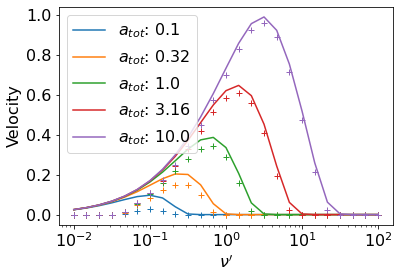

In [16]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", "tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]

#compare the analytic and numeric steady state velocities for a given a0
for i in range(a0_n):
    plot(nus, v_a0[i],"-", color = colors[i], label = r"$a_{tot}$: "+str(round(a0s[i],2)))
    plot(nus, vs[i],"+", color = colors[i])

    xscale("log")
    ylabel("Velocity", fontsize = 16)
    xlabel(r"$\nu'$", fontsize = 16)
    yticks(fontsize = 16)
    xticks(fontsize = 16)
    legend(fontsize = 16)

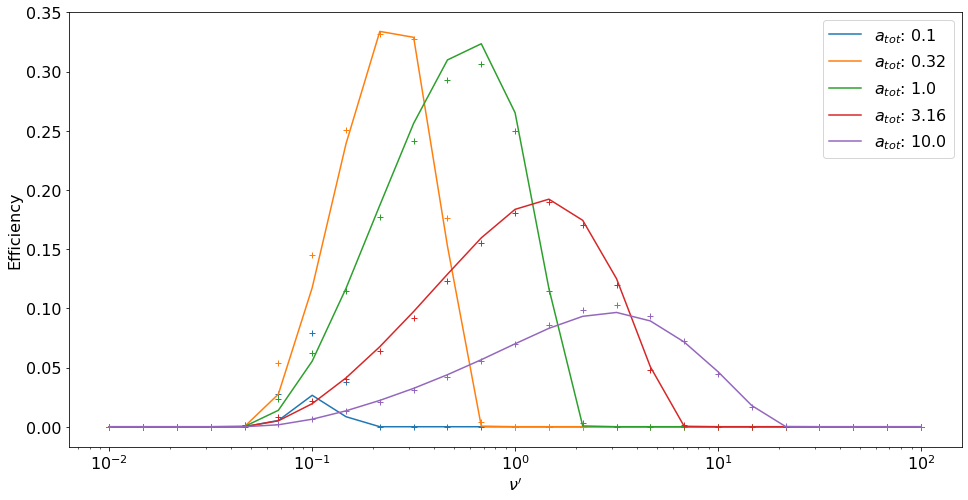

In [47]:
eff_a0 = []
for i in range(a0_n):
    eff_a0.append(v_a0[i]/a0s[i])

colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", "tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]

#compare the analytic and numeric steady state velocities for a given a0
figure(figsize = (16,8))
for i in range(a0_n):
    astdy = a0s[i]/(1+koff)
    v = v_a0[i]
    v = vs[i]
    plot(nus, v**2/(v*astdy+0.5*1/v*(koff*astdy)),"-", color = colors[i], label = r"$a_{tot}$: "+str(round(a0s[i],2)))
    plot(nus, vs[i]**2/burnt[i],"+", color = colors[i])

    xscale("log")
    ylabel("Efficiency", fontsize = 16)
    xlabel(r"$\nu'$", fontsize = 16)
    yticks(fontsize = 16)
    xticks(fontsize = 16)
    legend(fontsize = 16)